# 2. Image Classification

WORK FLOW

1. Download the Kaggle Cats and Dogs datset and select a subset of 2000 dog images and 2000 cat images for training, validation, and testing. The reduced dataset simulates the condition of limited data.
2. Build a convolutional neural network (CNN) with several convolution, pooling, and normalization layers, followed by one or more dense layers. Flatten the output between the convolution and dense layers. Evaluate the model's performance on the validation set.
3. Modify the data generator to include data augmentation, and evaluate the performance on the validation set again.
4. Replace the convolution layers with a pre-trained VGG16 convolutional base, and evaluate the model's performance on the validation set.
5. Evaluate the algorithm and report results.

# 2.1 Kaggle Cats and Dogs Dataset(Training, Validation and Testing)

In [1]:
# Problem 1

import os
import shutil
import random

# Set the paths
cat_dir = '/Users/kisht2t/Downloads/AS3/PetImages/Cat'
dog_dir = '/Users/kisht2t/Downloads/AS3/PetImages/Dog'

# Create directories for the organized dataset
output_base_dir = '/Users/kisht2t/Downloads/AS3/data/cats_and_dogs'
for set_name in ['train', 'validation', 'test']:
    for class_name in ['cats', 'dogs']:
        os.makedirs(os.path.join(output_base_dir, set_name, class_name), exist_ok=True)

# Function to move a subset of images
def move_subset(src_dir, dest_dir, num_images):
    images = [img for img in os.listdir(src_dir) if img.lower().endswith(('.png', '.jpg', '.jpeg'))]
    selected_images = random.sample(images, min(num_images, len(images)))
    for img in selected_images:
        src_path = os.path.join(src_dir, img)
        dest_path = os.path.join(dest_dir, img)
        shutil.copy(src_path, dest_path)  # Using copy instead of move to preserve original dataset

# Select and copy subsets for cats
move_subset(cat_dir, os.path.join(output_base_dir, 'train', 'cats'), 1400)
move_subset(cat_dir, os.path.join(output_base_dir, 'validation', 'cats'), 300)
move_subset(cat_dir, os.path.join(output_base_dir, 'test', 'cats'), 300)

# Select and copy subsets for dogs
move_subset(dog_dir, os.path.join(output_base_dir, 'train', 'dogs'), 1400)
move_subset(dog_dir, os.path.join(output_base_dir, 'validation', 'dogs'), 300)
move_subset(dog_dir, os.path.join(output_base_dir, 'test', 'dogs'), 300)

print("Kaggle Dogs and Cats Dataset is downloaded.")
print("Corrupted Images have been removed.")
print("Dataset organization complete.")

# Print the number of images in each set
for set_name in ['train', 'validation', 'test']:
    for class_name in ['cats', 'dogs']:
        path = os.path.join(output_base_dir, set_name, class_name)
        num_images = len([f for f in os.listdir(path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))])
        print(f"Number of {class_name} images in {set_name} set: {num_images}")

Kaggle Dogs and Cats Dataset is downloaded.
Corrupted Images have been removed.
Dataset organization complete.
Number of cats images in train set: 1400
Number of dogs images in train set: 1400
Number of cats images in validation set: 300
Number of dogs images in validation set: 300
Number of cats images in test set: 300
Number of dogs images in test set: 300


# 2.2 CNN Model

Found 2800 images belonging to 2 classes.
Found 600 images belonging to 2 classes.
Found 600 images belonging to 2 classes.
Epoch 1/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 270s 3s/step - accuracy: 0.5380 - loss: 1.0050 - val_accuracy: 0.5243 - val_loss: 0.7753
Epoch 2/20
 1/87 ━━━━━━━━━━━━━━━━━━━━ 4:11 3s/step - accuracy: 0.5312 - loss: 0.8094

2024-10-20 00:52:59.327437: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


87/87 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.5312 - loss: 0.8094 - val_accuracy: 0.8333 - val_loss: 0.4544
Epoch 3/20


2024-10-20 00:52:59.834286: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


87/87 ━━━━━━━━━━━━━━━━━━━━ 268s 3s/step - accuracy: 0.6054 - loss: 0.7672 - val_accuracy: 0.5052 - val_loss: 0.7579
Epoch 4/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6562 - loss: 0.6312 - val_accuracy: 1.0000 - val_loss: 0.3914
Epoch 5/20


2024-10-20 00:57:31.573290: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


87/87 ━━━━━━━━━━━━━━━━━━━━ 269s 3s/step - accuracy: 0.6593 - loss: 0.6591 - val_accuracy: 0.5972 - val_loss: 0.6902
Epoch 6/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6875 - loss: 0.6499 - val_accuracy: 0.2500 - val_loss: 0.9895
Epoch 7/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 269s 3s/step - accuracy: 0.6737 - loss: 0.6187 - val_accuracy: 0.5868 - val_loss: 0.7307
Epoch 8/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8438 - loss: 0.3757 - val_accuracy: 0.3750 - val_loss: 1.0254
Epoch 9/20


2024-10-20 01:06:35.944878: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


87/87 ━━━━━━━━━━━━━━━━━━━━ 269s 3s/step - accuracy: 0.7320 - loss: 0.5462 - val_accuracy: 0.6424 - val_loss: 0.6506
Epoch 10/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7188 - loss: 0.5205 - val_accuracy: 0.7917 - val_loss: 0.5493
Epoch 11/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 269s 3s/step - accuracy: 0.7425 - loss: 0.5021 - val_accuracy: 0.6632 - val_loss: 0.6199
Epoch 12/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7188 - loss: 0.5997 - val_accuracy: 0.7917 - val_loss: 0.5035
Epoch 13/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 268s 3s/step - accuracy: 0.7686 - loss: 0.4649 - val_accuracy: 0.6910 - val_loss: 0.6499
Epoch 14/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7812 - loss: 0.4519 - val_accuracy: 0.7917 - val_loss: 0.5587
Epoch 15/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 621s 7s/step - accuracy: 0.7850 - loss: 0.4578 - val_accuracy: 0.7135 - val_loss: 0.6522
Epoch 16/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8750 - loss: 0.4168 - val_accuracy: 0.6250 - val_loss:

2024-10-20 01:30:37.369481: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


87/87 ━━━━━━━━━━━━━━━━━━━━ 270s 3s/step - accuracy: 0.8104 - loss: 0.3949 - val_accuracy: 0.5851 - val_loss: 0.8819
Epoch 18/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7500 - loss: 0.5011 - val_accuracy: 0.9167 - val_loss: 0.2434
Epoch 19/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 269s 3s/step - accuracy: 0.8193 - loss: 0.3746 - val_accuracy: 0.7257 - val_loss: 0.6620
Epoch 20/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8438 - loss: 0.3433 - val_accuracy: 0.6667 - val_loss: 0.6588
18/18 ━━━━━━━━━━━━━━━━━━━━ 12s 678ms/step - accuracy: 0.7575 - loss: 0.5779
Test accuracy: 0.74


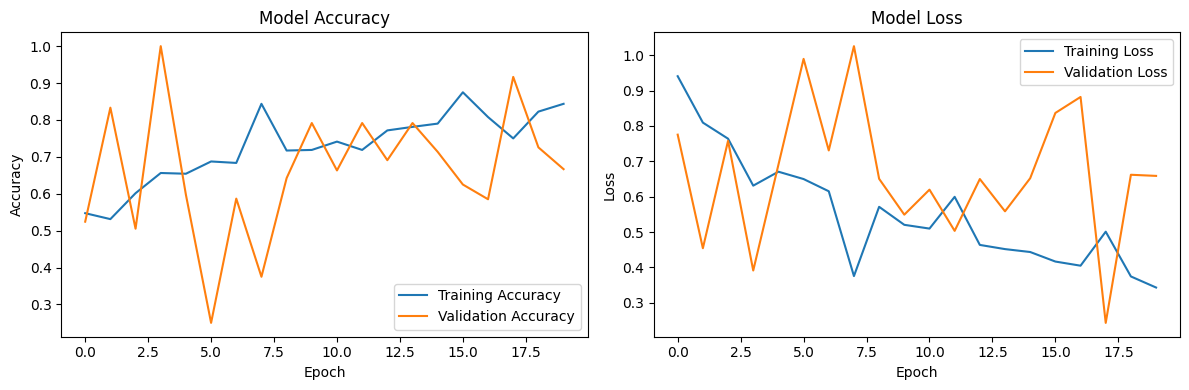

In [3]:
# Problem 3

import warnings
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

# Set up data paths
train_dir = '/Users/kisht2t/Downloads/AS3/data/cats_and_dogs/train'
validation_dir = '/Users/kisht2t/Downloads/AS3/data/cats_and_dogs/validation'
test_dir = '/Users/kisht2t/Downloads/AS3/data/cats_and_dogs/test'

validation_datagen = ImageDataGenerator(rescale=1./255)
train_datagen = ImageDataGenerator(rescale=1./255)

# Create data generators
batch_size = 32

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

test_generator = train_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

# Define the CNN model
def build_cnn_model():
    model = models.Sequential([
        layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(224, 224, 3)),
        layers.BatchNormalization(),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        
        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        
        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(256, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

# Build and compile the CNN model
model = build_cnn_model()
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model using the generators directly
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print(f"Test accuracy: {test_accuracy:.2f}")

# Plot training and validation accuracy/loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Save the trained model
model.save('cats_dogs_cnn_model.h5')


# 2.3 CNN Model with Data Augmentation

Found 2800 images belonging to 2 classes.
Found 600 images belonging to 2 classes.
Found 600 images belonging to 2 classes.
Epoch 1/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 272s 3s/step - accuracy: 0.5782 - loss: 0.9703 - val_accuracy: 0.5833 - val_loss: 0.6801
Epoch 2/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6250 - loss: 0.7507 - val_accuracy: 0.0833 - val_loss: 0.9291
Epoch 3/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 269s 3s/step - accuracy: 0.5748 - loss: 0.8059 - val_accuracy: 0.5174 - val_loss: 0.9136
Epoch 4/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.5625 - loss: 0.7383 - val_accuracy: 0.0000e+00 - val_loss: 1.8148
Epoch 5/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 269s 3s/step - accuracy: 0.5826 - loss: 0.7511 - val_accuracy: 0.6233 - val_loss: 0.6779
Epoch 6/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.5625 - loss: 0.9368 - val_accuracy: 0.1250 - val_loss: 1.3182
Epoch 7/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 271s 3s/step - accuracy: 0.6150 - loss: 0.7064 - val_accuracy: 0.6250 - val

2024-10-20 03:29:57.735712: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


87/87 ━━━━━━━━━━━━━━━━━━━━ 270s 3s/step - accuracy: 0.6510 - loss: 0.6328 - val_accuracy: 0.6597 - val_loss: 0.6143
Epoch 14/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7812 - loss: 0.4938 - val_accuracy: 0.6250 - val_loss: 0.7339
Epoch 15/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 270s 3s/step - accuracy: 0.6820 - loss: 0.6020 - val_accuracy: 0.5399 - val_loss: 0.7128
Epoch 16/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7188 - loss: 0.5432 - val_accuracy: 0.8333 - val_loss: 0.4992
Epoch 17/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 271s 3s/step - accuracy: 0.6762 - loss: 0.5961 - val_accuracy: 0.6997 - val_loss: 0.6094
Epoch 18/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7812 - loss: 0.6071 - val_accuracy: 0.5417 - val_loss: 0.7539
Epoch 19/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 270s 3s/step - accuracy: 0.6870 - loss: 0.5736 - val_accuracy: 0.6458 - val_loss: 0.6001
Epoch 20/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7188 - loss: 0.4479 - val_accuracy: 0.2083 - val_loss:

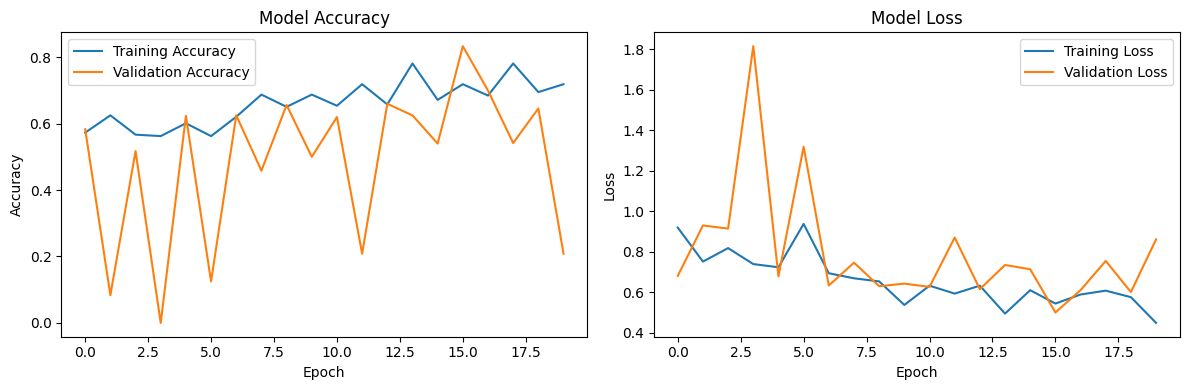

In [4]:
# Problem 3

import warnings
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

# Set up data paths
train_dir = '/Users/kisht2t/Downloads/AS3/data/cats_and_dogs/train'
validation_dir = '/Users/kisht2t/Downloads/AS3/data/cats_and_dogs/validation'
test_dir = '/Users/kisht2t/Downloads/AS3/data/cats_and_dogs/test'

# Set up data generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Create data generators
batch_size = 32

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

# Define the CNN model
def build_cnn_model():
    model = models.Sequential([
        layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(224, 224, 3)),
        layers.BatchNormalization(),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        
        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        
        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(256, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

# Build and compile the CNN model
model = build_cnn_model()
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model using the generators directly
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print(f"Test accuracy: {test_accuracy:.2f}")

# Plot training and validation accuracy/loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Save the trained model
model.save('cats_dogs_cnn_aug_model.h5')

# 2.4 CNN with Pre_Trained VGG-16 Base

Found 2800 images belonging to 2 classes.
Found 600 images belonging to 2 classes.
Found 600 images belonging to 2 classes.


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    12,845,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,560,769 (105.14 MB)

 Trainable params: 12,846,081 (49.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

Epoch 1/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 130s 1s/step - accuracy: 0.6816 - loss: 1.4489 - val_accuracy: 0.8933 - val_loss: 0.2417
Epoch 2/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 116us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/20


2024-10-20 02:29:31.457033: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-20 02:29:31.459477: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


88/88 ━━━━━━━━━━━━━━━━━━━━ 132s 2s/step - accuracy: 0.8323 - loss: 0.3670 - val_accuracy: 0.9133 - val_loss: 0.2198
Epoch 4/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 50us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/20


2024-10-20 02:31:43.450630: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


88/88 ━━━━━━━━━━━━━━━━━━━━ 132s 2s/step - accuracy: 0.8495 - loss: 0.3325 - val_accuracy: 0.9150 - val_loss: 0.2186
Epoch 6/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 49us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 132s 2s/step - accuracy: 0.8559 - loss: 0.3144 - val_accuracy: 0.9083 - val_loss: 0.2342
Epoch 8/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 51us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/20


2024-10-20 02:36:07.781613: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


88/88 ━━━━━━━━━━━━━━━━━━━━ 133s 2s/step - accuracy: 0.8784 - loss: 0.2782 - val_accuracy: 0.9050 - val_loss: 0.2117
Epoch 10/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 48us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 11/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 133s 2s/step - accuracy: 0.8804 - loss: 0.2827 - val_accuracy: 0.9167 - val_loss: 0.2129
Epoch 12/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 46us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 13/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 132s 2s/step - accuracy: 0.8678 - loss: 0.2945 - val_accuracy: 0.9000 - val_loss: 0.2360
Epoch 14/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 46us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 15/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 133s 2s/step - accuracy: 0.8643 - loss: 0.2996 - val_accuracy: 0.9117 - val_loss: 0.2014
Epoch 16/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 49us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 17/20


2024-10-20 02:44:57.636239: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


88/88 ━━━━━━━━━━━━━━━━━━━━ 133s 2s/step - accuracy: 0.8805 - loss: 0.2768 - val_accuracy: 0.9200 - val_loss: 0.1980
Epoch 18/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 47us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 19/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 133s 2s/step - accuracy: 0.8808 - loss: 0.2673 - val_accuracy: 0.9217 - val_loss: 0.1891
Epoch 20/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 46us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
19/19 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.9178 - loss: 0.2076
Validation Accuracy: 0.92


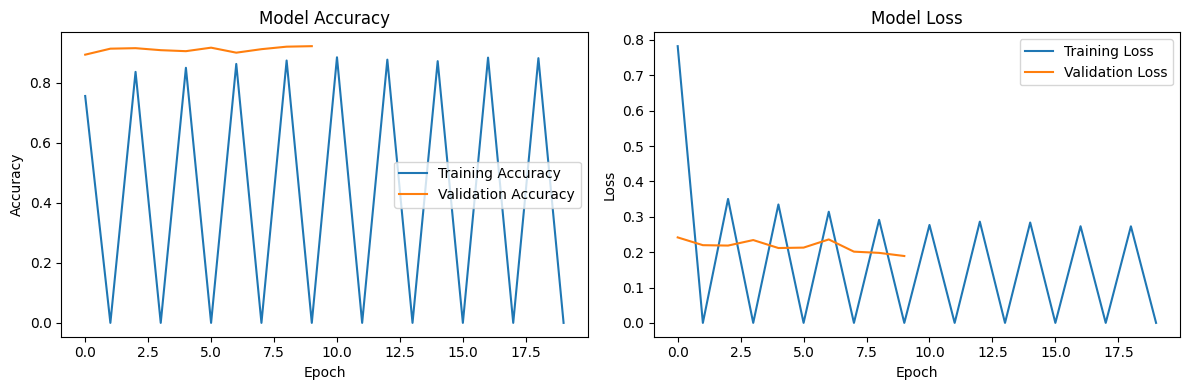

19/19 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.9145 - loss: 0.2167
Test Accuracy: 0.92


In [1]:
# Problem 4

import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

# Set up data paths
train_dir = '/Users/kisht2t/Downloads/AS3/data/cats_and_dogs/train'
validation_dir = '/Users/kisht2t/Downloads/AS3/data/cats_and_dogs/validation'
test_dir = '/Users/kisht2t/Downloads/AS3/data/cats_and_dogs/test'

# Set up data generators (no .repeat() usage)
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

batch_size = 32

# Create data generators
train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=(224, 224), batch_size=batch_size, class_mode='binary', shuffle=True
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir, target_size=(224, 224), batch_size=batch_size, class_mode='binary', shuffle=False
)

test_generator = test_datagen.flow_from_directory(
    test_dir, target_size=(224, 224), batch_size=batch_size, class_mode='binary', shuffle=False
)

# Load the VGG16 convolutional base without dense layers
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the VGG16 base to prevent updating weights during training
vgg_base.trainable = False

# Build the model on top of the VGG16 base
model = models.Sequential([
    vgg_base,
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model to track accuracy only
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

# Use EarlyStopping to prevent overfitting (monitor 'val_accuracy')
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

# Train the model using the adjusted callbacks
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=20,
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
    callbacks=[early_stopping]
)

# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(validation_generator, steps=len(validation_generator))
print(f"Validation Accuracy: {val_accuracy:.2f}")

# Plot training and validation accuracy/loss
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
if 'val_loss' in history.history:
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
else:
    print("Warning: 'val_loss' not found in history, skipping loss plot.")

plt.tight_layout()
plt.show()

# Save the trained model
model.save('vgg16_cats_dogs_model.h5')

# Test the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_generator, steps=len(test_generator))
print(f"Test Accuracy: {test_accuracy:.2f}")

Found 600 images belonging to 2 classes.


Successfully loaded Custom CNN model.


Successfully loaded CNN with Data Augmentation model.
Successfully loaded VGG16 Transfer Learning model.

Evaluating Custom CNN...
19/19 ━━━━━━━━━━━━━━━━━━━━ 13s 652ms/step - accuracy: 0.7170 - loss: 0.6071
Custom CNN - Test Accuracy: 0.6750
19/19 ━━━━━━━━━━━━━━━━━━━━ 12s 644ms/step
Custom CNN - Classification Report:
               precision    recall  f1-score   support

        Cats       0.65      0.74      0.70       300
        Dogs       0.70      0.61      0.65       300

    accuracy                           0.68       600
   macro avg       0.68      0.68      0.67       600
weighted avg       0.68      0.68      0.67       600



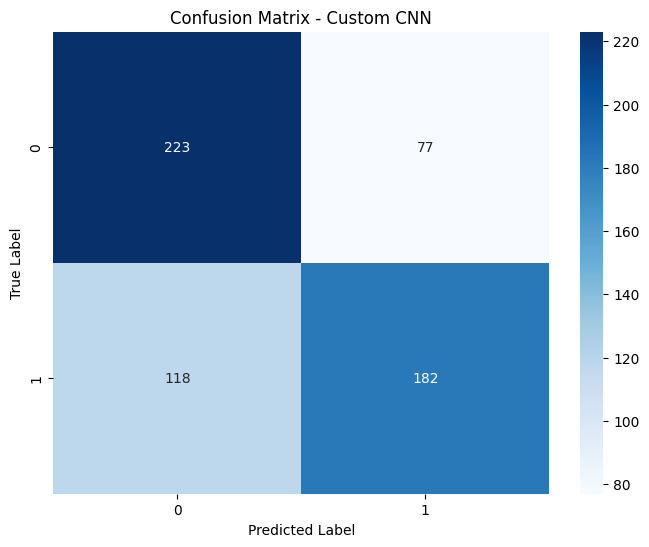


Evaluating CNN with Data Augmentation...
19/19 ━━━━━━━━━━━━━━━━━━━━ 12s 644ms/step - accuracy: 0.7491 - loss: 0.5673
CNN with Data Augmentation - Test Accuracy: 0.6483
19/19 ━━━━━━━━━━━━━━━━━━━━ 13s 672ms/step
CNN with Data Augmentation - Classification Report:
               precision    recall  f1-score   support

        Cats       0.61      0.82      0.70       300
        Dogs       0.72      0.48      0.58       300

    accuracy                           0.65       600
   macro avg       0.67      0.65      0.64       600
weighted avg       0.67      0.65      0.64       600



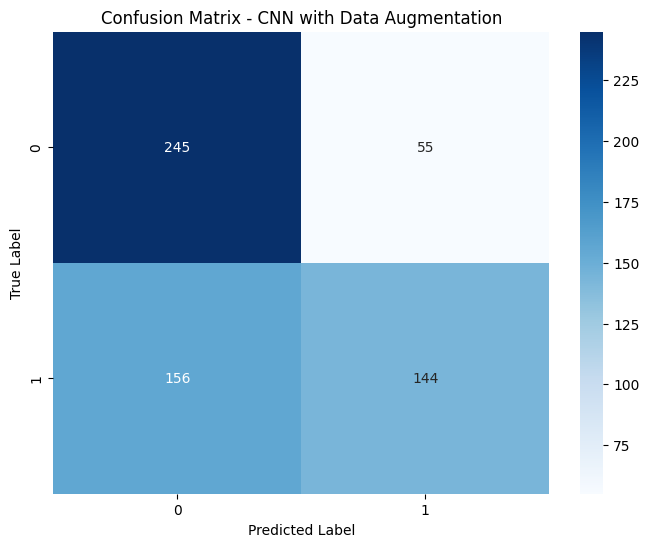


Evaluating VGG16 Transfer Learning...
19/19 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.9145 - loss: 0.2167
VGG16 Transfer Learning - Test Accuracy: 0.9233
19/19 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step
VGG16 Transfer Learning - Classification Report:
               precision    recall  f1-score   support

        Cats       0.93      0.91      0.92       300
        Dogs       0.91      0.94      0.92       300

    accuracy                           0.92       600
   macro avg       0.92      0.92      0.92       600
weighted avg       0.92      0.92      0.92       600



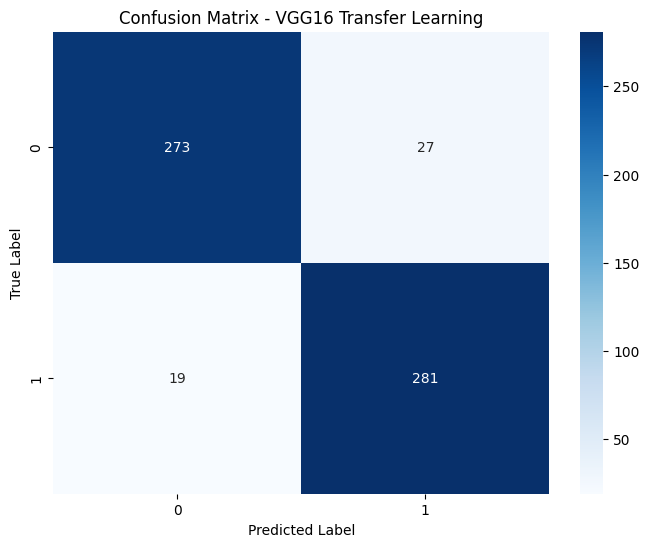

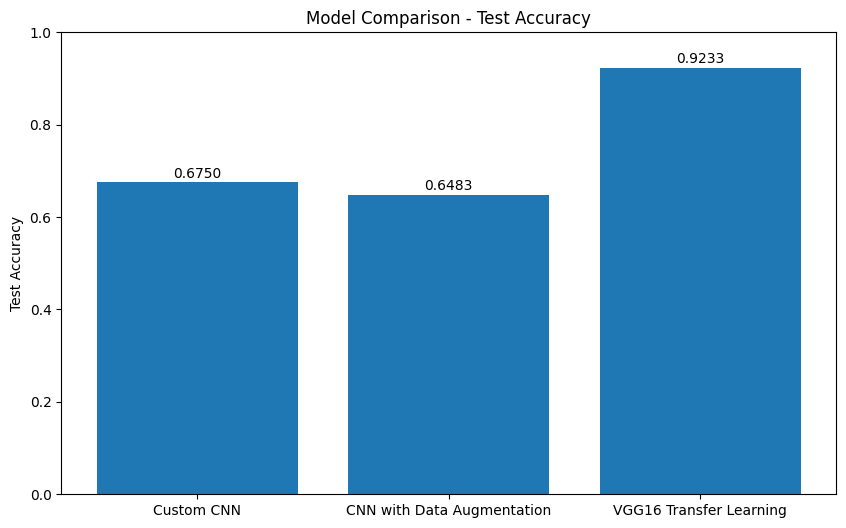


Overall Summary:
-----------------
Custom CNN - Test Accuracy: 0.6750
CNN with Data Augmentation - Test Accuracy: 0.6483
VGG16 Transfer Learning - Test Accuracy: 0.9233

Evaluation complete. Please refer to the generated plots and summaries for detailed results.


In [6]:
# Problem 5

import warnings
import os
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

warnings.filterwarnings('ignore')

# Set up data paths
test_dir = '/Users/kisht2t/Downloads/AS3/data/cats_and_dogs/test'

# Set up data generator for the test set
test_datagen = ImageDataGenerator(rescale=1./255)

batch_size = 32
img_size = (224, 224)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

# Check for the existence of the trained model files
model_files = {
    'Custom CNN': 'cats_dogs_cnn_model.h5',
    'CNN with Data Augmentation': 'cats_dogs_cnn_aug_model.h5',
    'VGG16 Transfer Learning': 'vgg16_cats_dogs_model.h5'
}

existing_models = {}
missing_models = []

for model_name, file_name in model_files.items():
    if os.path.exists(file_name):
        try:
            existing_models[model_name] = load_model(file_name)
            print(f"Successfully loaded {model_name} model.")
        except Exception as e:
            print(f"Error loading {model_name} model: {str(e)}")
            missing_models.append(model_name)
    else:
        print(f"{model_name} model file not found: {file_name}")
        missing_models.append(model_name)

if not existing_models:
    print("No models could be loaded. Please ensure the model files are in the correct directory.")
    exit()

# Function to evaluate model and plot confusion matrix
def evaluate_model(model, generator, model_name):
    # Evaluate the model
    test_loss, test_accuracy = model.evaluate(generator, steps=len(generator))
    print(f"{model_name} - Test Accuracy: {test_accuracy:.4f}")
    
    # Get predictions
    y_pred = model.predict(generator, steps=len(generator))
    y_pred = (y_pred > 0.5).astype(int)
    y_true = generator.classes
    
    # Generate classification report
    report = classification_report(y_true, y_pred, target_names=['Cats', 'Dogs'])
    print(f"{model_name} - Classification Report:\n", report)
    
    # Generate and plot confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()
    
    return test_accuracy, y_true, y_pred

# Evaluate all available models
results = {}
for name, model in existing_models.items():
    print(f"\nEvaluating {name}...")
    accuracy, y_true, y_pred = evaluate_model(model, test_generator, name)
    results[name] = {'accuracy': accuracy, 'y_true': y_true, 'y_pred': y_pred}

# Compare model performances
accuracies = [results[model]['accuracy'] for model in existing_models]
model_names = list(existing_models.keys())

plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies)
plt.title('Model Comparison - Test Accuracy')
plt.ylabel('Test Accuracy')
plt.ylim(0, 1)
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f'{v:.4f}', ha='center')
plt.show()

# Print overall summary
print("\nOverall Summary:")
print("-----------------")
for name in existing_models:
    print(f"{name} - Test Accuracy: {results[name]['accuracy']:.4f}")

if missing_models:
    print("\nMissing Models:")
    print("---------------")
    for model in missing_models:
        print(f"- {model}")

print("\nEvaluation complete. Please refer to the generated plots and summaries for detailed results.")